### Importación de Librerías

In [5]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from nltk.corpus import stopwords
import nltk

# Descargar stopwords si no lo has hecho antes
nltk.download("stopwords")

# Crear conjunto de stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to C:\Users\Hermes
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Carga y procesamiento del archivo de reseñas

In [6]:
# Ruta al archivo
file_path = r"C:\AI Exclusive\portfolio_final\datasets\multidomain_sentiments\unprocessed\sorted_data\apparel\all.review"

# Función para procesar el archivo
def process_review_file(file_path):
    with open(file_path, "r", encoding="latin-1") as f:
        lines = f.readlines()

    reviews = []  # Lista para almacenar las reseñas

    current_review = {}
    tag = None

    for line in lines:
        line = line.strip()

        # Detectar apertura de una etiqueta
        if line.startswith("<") and not line.startswith("</"):
            tag = line[1:-1]  # Extraer el nombre de la etiqueta
            current_review[tag] = ""
        elif line.startswith("</"):
            tag = line[2:-1]  # Etiqueta de cierre
            if tag == "review":  # Fin de una reseña
                reviews.append(current_review)
                current_review = {}
        else:
            # Agregar contenido dentro de la etiqueta
            if tag:
                current_review[tag] += line

    return pd.DataFrame(reviews)

# Cargar el archivo si no existe df
if 'df' not in globals():
    df = process_review_file(file_path)

# Inspeccionar las primeras filas
print(f"Total de reseñas procesadas: {len(df)}")
print(df.head())


Total de reseñas procesadas: 9252
  review unique_id        asin  \
0             2179  B000AN11UA   
1             2180  B000AN11UA   
2            60408  B000B5S85I   
3            60412  B000B5S85I   
4            81347  B00007LBZR   

                                        product_name product_type   helpful  \
0  Incase Limited Edition iPod Case - "Fleur" Sig...      apparel    3 of 3   
1  Incase Limited Edition iPod Case - "Fleur" Sig...      apparel    3 of 5   
2  Vintage Fatigue Style Cap (with or without Sta...      apparel    0 of 1   
3  Vintage Fatigue Style Cap (with or without Sta...      apparel   3 of 12   
4        Mens Collar Stays for Dress Shirts: Apparel      apparel  19 of 21   

  rating                         title              date  \
0    1.0                  disappointed    March 10, 2006   
1    1.0    Cute But Way Disappointing  January 13, 2006   
2    2.0             Camo Fatigue hat.  November 3, 2006   
3    1.0  What's next?  The swastika??     Jul

### Asegurar columnas clave

In [7]:
# Asegurar que las columnas necesarias existen
if 'processed_text' not in df.columns:
    df['processed_text'] = df['review_text']

if 'sentiment' not in df.columns:
    def classify_sentiment(rating):
        if float(rating) >= 4.0:
            return "positivo"
        elif float(rating) <= 2.0:
            return "negativo"
        else:
            return "neutral"

    df['sentiment'] = df['rating'].apply(classify_sentiment)

# Inspeccionar las columnas actualizadas
print(df[['processed_text', 'sentiment']].head())


                                      processed_text sentiment
0  I want to start by saying Fred Flare- shipped ...  negativo
1  I have to say that I was disappointed when I o...  negativo
2  I am sorry but I did not like it nor will I we...  negativo
3  A red star!?!?  I bet this won't sell well in ...  negativo
4  Perhaps it is my own fault for not reading mor...  negativo


### Crear DataFrame limpio

In [8]:
# Crear un DataFrame limpio
if 'df_cleaned' not in globals():
    df_cleaned = df[["processed_text", "sentiment"]].copy()

# Inspeccionar las primeras filas del DataFrame limpio
print(df_cleaned.head())


                                      processed_text sentiment
0  I want to start by saying Fred Flare- shipped ...  negativo
1  I have to say that I was disappointed when I o...  negativo
2  I am sorry but I did not like it nor will I we...  negativo
3  A red star!?!?  I bet this won't sell well in ...  negativo
4  Perhaps it is my own fault for not reading mor...  negativo


###  Eliminar stopwords

In [9]:
# Función para eliminar stopwords
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Aplicar eliminación de stopwords
df_cleaned["processed_text"] = df_cleaned["processed_text"].apply(remove_stopwords)

# Inspeccionar los datos procesados
print(df_cleaned.head())

                                      processed_text sentiment
0  I want start saying Fred Flare- shipped produc...  negativo
1  I say I disappointed I opened package containi...  negativo
2  I sorry I like I wear big & looks funny me. I ...  negativo
3     A red star!?!? I bet sell well eastern Europe.  negativo
4  Perhaps fault reading closely, failing questio...  negativo


###  Visualización de distribución de sentimientos

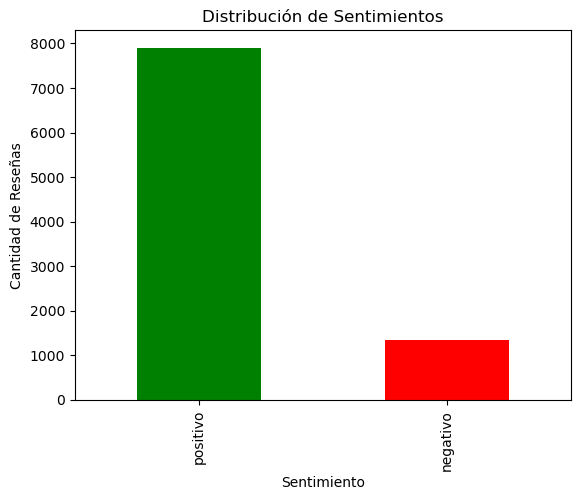

In [10]:
# Visualización de distribución de sentimientos
df_cleaned["sentiment"].value_counts().plot(kind="bar", color=["green", "red", "orange"])
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Reseñas")
plt.show()


### Análisis de frecuencia de palabras

In [11]:
# Análisis de frecuencia de palabras
all_words = chain.from_iterable(df_cleaned["processed_text"].str.split())
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)

# Mostrar las palabras más comunes
print("Palabras más comunes:", common_words)


Palabras más comunes: [('I', 17868), ('The', 3512), ('like', 2064), ('They', 1873), ('great', 1809), ('wear', 1679), ('This', 1618), ('would', 1611), ('It', 1607), ('shoes', 1604)]


##### Guardar Dataframe para futuros análisis

In [12]:
import os

# Nueva ruta simplificada
output_dir = r"C:\AI Exclusive\portfolio_final\analisis_sentimientos_multidominio\outputs"

# Guardar el archivo
df_cleaned.to_csv(os.path.join(output_dir, "cleaned_data.csv"), index=False)